In [40]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame 
import nltk

from sklearn.neighbors import NearestNeighbors
from sklearn.linear_model import LogisticRegression
from sklearn import neighbors
from scipy.spatial.distance import cosine
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

import re
import string
from wordcloud import WordCloud, STOPWORDS
from sklearn.metrics import mean_squared_error

In [41]:
reviews = pd.read_json('reviews_Video_Games.json',lines=True)
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013"
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013"
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013"
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014"
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013"


In [42]:
print(reviews.columns)
print(reviews.shape)

Index(['reviewerID', 'asin', 'reviewerName', 'helpful', 'reviewText',
       'overall', 'summary', 'unixReviewTime', 'reviewTime'],
      dtype='object')
(1324753, 9)


In [43]:
count=reviews.groupby('asin',as_index=False).count()
mean=reviews.groupby('asin',as_index=False).mean()

review_merge=pd.merge(reviews,count,how='right',on=['asin'])
review_merge

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013",3,3,3,3,3,3,3,3
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013",3,3,3,3,3,3,3,3
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013",3,3,3,3,3,3,3,3
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014",4,4,4,4,4,4,4,4
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013",4,4,4,4,4,4,4,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1324748,A3HMVWAGUCNA1K,B00LGBJIQ4,Steven Collins,"[0, 0]",Rarely does a daytime hour go by without me to...,5,My Perfect Keyboard,1405987200,"07 22, 2014",4,4,4,4,4,4,4,4
1324749,A14H2HEWFT7CLQ,B00LGBKSK4,Andy Lewter,"[1, 1]","Really great Keyboard, I bought this for the w...",5,I think it's great!,1405900800,"07 21, 2014",2,2,2,2,2,2,2,2
1324750,A2EHIE51TERF2C,B00LGBKSK4,Rishabh Tiwari,"[0, 0]",I am looking for a keyboard like this with goo...,5,Recommended,1405900800,"07 21, 2014",2,2,2,2,2,2,2,2
1324751,A39GDUJP1737E1,B00LI0VTS8,sg,"[0, 0]",ok if you are bored. but not good for long tim...,1,One Star,1405296000,"07 14, 2014",1,1,1,1,1,1,1,1


In [44]:
review_merge["totalReviewers"] = review_merge["reviewerID_y"]
review_merge["overallScore"] = review_merge["overall_x"]
review_merge["summaryReview"] = review_merge["summary_x"]

dfNew = review_merge[['asin','summaryReview','overallScore',"totalReviewers"]]

In [45]:
dfNew.head()

,asin,summaryReview,overallScore,totalReviewers
0,0078764343,Good game and Beta access!!,5,3
1,0078764343,Love the game,5,3
2,0078764343,MOH nice,4,3
3,043933702X,Five Stars,5,4
4,043933702X,memory lane,5,4


In [46]:
review_merge = review_merge.sort_values(by='totalReviewers', ascending=False)
dfCount = review_merge[review_merge.totalReviewers >= 100]
dfCount

,reviewerID_x,asin,reviewerName_x,helpful_x,reviewText_x,overall_x,summary_x,unixReviewTime_x,reviewTime_x,reviewerID_y,reviewerName_y,helpful_y,reviewText_y,overall_y,summary_y,unixReviewTime_y,reviewTime_y,totalReviewers,overallScore,summaryReview
1253615,A3NK2V7789AN0E,B00DJFIMW6,NaN,"[0, 0]",takes 20 minutes to load on my kindle fire but...,2,takes too long to load on kindle fire,1376265600,"08 12, 2013",16221,6275,16221,16221,16221,16221,16221,16221,16221,2,takes too long to load on kindle fire
1257598,A3L4LT3FA9N5ZP,B00DJFIMW6,Amazon Customer,"[0, 0]",I allowed my granddaughter to put this on my G...,5,wonderful,1396828800,"04 7, 2014",16221,6275,16221,16221,16221,16221,16221,16221,16221,5,wonderful
1257588,A2KIB53YOLDD63,B00DJFIMW6,Amazon Customer,"[0, 0]",Fun game really enjoy it have been playing on ...,4,addicting,1401580800,"06 1, 2014",16221,6275,16221,16221,16221,16221,16221,16221,16221,4,addicting
1257589,A14G8HL3Q1BZNX,B00DJFIMW6,Amazon Customer,"[0, 0]",Fun,4,Four Stars,1404777600,"07 8, 2014",16221,6275,16221,16221,16221,16221,16221,16221,16221,4,Four Stars
1257590,A1CER31COKBFAM,B00DJFIMW6,Amazon Customer,"[0, 0]",Get it now. It is great. Me and my little brot...,5,#fabulous,1402099200,"06 7, 2014",16221,6275,16221,16221,16221,16221,16221,16221,16221,5,#fabulous
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1273572,A15CVUCXRNE2IV,B00ECHYTKY,cha,"[0, 0]",I got all series of X-COM(except X com enemy w...,5,Most Cheaper paekage,1384041600,"11 10, 2013",100,100,100,100,100,100,100,100,100,5,Most Cheaper paekage
1273571,A10FQIV91CA9M5,B00ECHYTKY,Cesar Martin,"[0, 0]","Great games, could not beat the price on the b...",5,Great time spender,1390780800,"01 27, 2014",100,100,100,100,100,100,100,100,100,5,Great time spender
1273570,AI68TZGI0OEN1,B00ECHYTKY,Casey Bair,"[0, 0]",Got the collection for $10 and it was more tha...,4,Good pack of games for a good price,1381190400,"10 8, 2013",100,100,100,100,100,100,100,100,100,4,Good pack of games for a good price
820229,A1XFTK9RMMLYDK,B003YTRIOU,Justin,"[0, 0]","If you have the Red Ring of Death, this will d...",5,Just Buy It,1344816000,"08 13, 2012",100,100,100,100,100,100,100,100,100,5,Just Buy It


In [47]:
dfProductReview = reviews.groupby("asin", as_index=False).mean()
ProductReviewSummary = dfCount.groupby("asin")["summaryReview"].apply(list)
ProductReviewSummary = pd.DataFrame(ProductReviewSummary)
ProductReviewSummary.to_csv("ProductReviewSummary.csv")

In [48]:
dfProductReview

,asin,overall,unixReviewTime
0,0078764343,4.666667,1.374451e+09
1,043933702X,4.000000,1.382854e+09
2,0439339960,3.000000,1.288570e+09
3,0439339987,5.000000,1.366848e+09
4,0439342260,4.000000,1.355875e+09
...,...,...,...
50205,B00LCLV730,3.000000,1.404691e+09
50206,B00LGBJIQ4,5.000000,1.405901e+09
50207,B00LGBKSK4,5.000000,1.405901e+09
50208,B00LI0VTS8,1.000000,1.405296e+09


In [49]:
df3 = pd.read_csv("ProductReviewSummary.csv")
df3 = pd.merge(df3, dfProductReview, on="asin", how='inner')

In [50]:
df3 = df3[['asin','summaryReview','overall']]
df3

,asin,summaryReview,overall
0,9625990674,"['Great!', 'No issues', 'Great Protective Case...",4.410256
1,B00000DMAA,"['GREAT GAME', 'FF7 is better than heaven', 'B...",4.607143
2,B00000DMAQ,"['Beautiful, mind-blowing, and fun!', 'Childho...",4.592593
3,B00000DMAT,"['This stinks', 'This game ROCKS!!', 'Yes!', '...",4.690141
4,B00000DMAX,"['Mario Kart 64', 'the best of the best', 'it ...",4.595122
...,...,...,...
2558,B00IRHE892,"['Great Mouse, NO MAC SUPPORT AT THE TIME OF W...",4.461538
2559,B00IS5E7O4,"['Five Stars', 'flowing an a good entertainer ...",4.493750
2560,B00J06HWC4,"['Pretty Fun', 'Well just darn zombie killing ...",4.470024
2561,B00JQHU9RC,"['Minecraft is awesome!', 'Five Stars', 'Defin...",4.637168


In [51]:
#function for tokenizing summary
regEx = re.compile('[^a-z]+')
def cleanReviews(reviewText):
    reviewText = reviewText.lower()
    reviewText = regEx.sub(' ', reviewText).strip()
    return reviewText

In [52]:
#reset index and drop duplicate rows
df3["summaryClean"] = df3["summaryReview"].apply(cleanReviews)
df3 = df3.drop_duplicates(['overall'], keep='last')
df3 = df3.reset_index()

In [53]:
reviews_new = df3["summaryClean"] 
countVector = CountVectorizer(max_features = 300, stop_words='english') 
transformedReviews = countVector.fit_transform(reviews_new) 

dfReviews = DataFrame(transformedReviews.A, columns=countVector.get_feature_names())
dfReviews = dfReviews.astype(int)

In [54]:
dfReviews.to_csv("dfReviews.csv")

In [55]:
# First let's create a dataset called X
X = np.array(dfReviews)
 # create train and test
tpercent = 0.9
tsize = int(np.floor(tpercent * len(dfReviews)))
dfReviews_train = X[:tsize]
dfReviews_test = X[tsize:]
#len of train and test
lentrain = len(dfReviews_train)
lentest = len(dfReviews_test)

In [56]:
print(lentrain)
print(lentest)

2143
239


In [57]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='ball_tree').fit(dfReviews_train)

# Let's find the k-neighbors of each point in object X. To do that we call the kneighbors() function on object X.
distances, indices = neighbor.kneighbors(dfReviews_train)

In [58]:
#find most related products
for i in range(lentest):
    a = neighbor.kneighbors([dfReviews_test[i]])
    related_product_list = a[1]

    first_related_product = [item[0] for item in related_product_list]
    first_related_product = str(first_related_product).strip('[]')
    first_related_product = int(first_related_product)
    second_related_product = [item[1] for item in related_product_list]
    second_related_product = str(second_related_product).strip('[]')
    second_related_product = int(second_related_product)
    
    print ("Based on product reviews, for ", df3["asin"][lentrain + i] ," average rating is ",df3["overall"][lentrain + i])
    print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
    print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
    print ("-----------------------------------------------------------")

Based on product reviews, for  B00B98HBTA  average rating is  4.265917602996255
The first similar product is  B002I0K3PM  average rating is  4.595238095238095
The second similar product is  B006ZPAYGE  average rating is  4.25
-----------------------------------------------------------
Based on product reviews, for  B00B98HDNO  average rating is  3.992481203007519
The first similar product is  B0088MVOT8  average rating is  4.070921985815603
The second similar product is  B006ZPAYD2  average rating is  4.427710843373494
-----------------------------------------------------------
Based on product reviews, for  B00B98HF1O  average rating is  4.550724637681159
The first similar product is  B0088MVOES  average rating is  4.620396600566572
The second similar product is  B006ZPAYGE  average rating is  4.25
-----------------------------------------------------------
Based on product reviews, for  B00B98HG18  average rating is  4.248062015503876
The first similar product is  B0088MVOT8  average

Based on product reviews, for  B00CMQTUSS  average rating is  4.339246119733924
The first similar product is  B0041HROGG  average rating is  3.958100558659218
The second similar product is  B004DTU0W2  average rating is  2.7769423558897244
-----------------------------------------------------------
Based on product reviews, for  B00CMQTUY2  average rating is  4.311764705882353
The first similar product is  B001E2D44W  average rating is  4.10655737704918
The second similar product is  B000BT4CF4  average rating is  4.3474576271186445
-----------------------------------------------------------
Based on product reviews, for  B00CMQTVK0  average rating is  3.910319963947724
The first similar product is  B003O6JKLC  average rating is  4.0599214145383105
The second similar product is  B000B43OY4  average rating is  3.5470852017937218
-----------------------------------------------------------
Based on product reviews, for  B00CMQTVUA  average rating is  3.7443298969072165
The first similar p

-----------------------------------------------------------
Based on product reviews, for  B00E4SC30O  average rating is  4.424
The first similar product is  B005IMVP0O  average rating is  4.421875
The second similar product is  B002I0JZIS  average rating is  4.392857142857143
-----------------------------------------------------------
Based on product reviews, for  B00E9I1FPI  average rating is  4.662790697674419
The first similar product is  B009WI7V9E  average rating is  4.803571428571429
The second similar product is  B006JKAS16  average rating is  4.698492462311558
-----------------------------------------------------------
Based on product reviews, for  B00EADTVL2  average rating is  4.095238095238095
The first similar product is  B001FWK340  average rating is  3.9776119402985075
The second similar product is  B003O6G114  average rating is  4.528301886792453
-----------------------------------------------------------
Based on product reviews, for  B00ECHYTKY  average rating is  4

The first similar product is  B000O3IS48  average rating is  4.269230769230769
The second similar product is  B00005NCCI  average rating is  3.5968992248062017
-----------------------------------------------------------
Based on product reviews, for  B00HLT0YT0  average rating is  4.543103448275862
The first similar product is  B005IMVP0O  average rating is  4.421875
The second similar product is  B002I0JZIS  average rating is  4.392857142857143
-----------------------------------------------------------
Based on product reviews, for  B00HVBPRUO  average rating is  4.470692717584369
The first similar product is  B002I0J5CO  average rating is  3.9740853658536586
The second similar product is  B003A7HHKG  average rating is  4.112084063047285
-----------------------------------------------------------
Based on product reviews, for  B00I056QGO  average rating is  3.3802083333333335
The first similar product is  B002I0HIMI  average rating is  3.832512315270936
The second similar product is 

In [59]:
print ("Based on product reviews, for ", df3["asin"][260] ," average rating is ",df3["overall"][260])
print ("The first similar product is ", df3["asin"][first_related_product] ," average rating is ",df3["overall"][first_related_product])
print ("The second similar product is ", df3["asin"][second_related_product] ," average rating is ",df3["overall"][second_related_product])
print ("-----------------------------------------------------------")

Based on product reviews, for  B00009WAUF  average rating is  3.9327731092436973
The first similar product is  B001BZ3PY6  average rating is  3.5238095238095237
The second similar product is  B000B43OXU  average rating is  3.6382978723404253
-----------------------------------------------------------


In [60]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       1.00      0.25      0.40         4
           3       0.61      0.42      0.50        78
           4       0.76      0.89      0.82       157

    accuracy                           0.72       239
   macro avg       0.79      0.52      0.57       239
weighted avg       0.71      0.72      0.71       239



In [61]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.7238493723849372


In [62]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.27615062761506276


In [63]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)

n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)
#print (knnpreds_test)

print(classification_report(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.62      0.40      0.48        78
           4       0.75      0.90      0.82       157

    accuracy                           0.72       239
   macro avg       0.46      0.43      0.44       239
weighted avg       0.70      0.72      0.70       239



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [64]:
print (accuracy_score(df5_test_target, knnpreds_test))

0.7238493723849372


In [65]:
print(mean_squared_error(df5_test_target, knnpreds_test))

0.27615062761506276


In [66]:
neighbor = NearestNeighbors(n_neighbors=3, algorithm='brute').fit(dfReviews_train)

distances, indices = neighbor.kneighbors(dfReviews_train)

In [67]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 3
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       1.00      0.25      0.40         4
           3       0.61      0.42      0.50        78
           4       0.76      0.89      0.82       157

    accuracy                           0.72       239
   macro avg       0.79      0.52      0.57       239
weighted avg       0.71      0.72      0.71       239

Accuracy:  0.7238493723849372
MSE:  0.27615062761506276


In [68]:
neighbor = NearestNeighbors(n_neighbors=5, algorithm='kd_tree').fit(dfReviews_train)
distances, indices = neighbor.kneighbors(dfReviews_train)

In [69]:
df5_train_target = df3["overall"][:lentrain]
df5_test_target = df3["overall"][lentrain:lentrain+lentest]
df5_train_target = df5_train_target.astype(int)
df5_test_target = df5_test_target.astype(int)
n_neighbors = 5
knnclf = neighbors.KNeighborsClassifier(n_neighbors, weights='distance')
knnclf.fit(dfReviews_train, df5_train_target)
knnpreds_test = knnclf.predict(dfReviews_test)

print(classification_report(df5_test_target, knnpreds_test))
print ("Accuracy: ",accuracy_score(df5_test_target, knnpreds_test))
print("MSE: ",mean_squared_error(df5_test_target, knnpreds_test))

              precision    recall  f1-score   support

           2       0.00      0.00      0.00         4
           3       0.62      0.40      0.48        78
           4       0.75      0.90      0.82       157

    accuracy                           0.72       239
   macro avg       0.46      0.43      0.44       239
weighted avg       0.70      0.72      0.70       239

Accuracy:  0.7238493723849372
MSE:  0.27615062761506276


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [70]:
reviews.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,AB9S9279OZ3QO,0078764343,Alan,"[1, 1]",I haven't gotten around to playing the campaig...,5,Good game and Beta access!!,1373155200,"07 7, 2013"
1,A24SSUT5CSW8BH,0078764343,Kindle Customer,"[0, 0]",I want to start off by saying I have never pla...,5,Love the game,1377302400,"08 24, 2013"
2,AK3V0HEBJMQ7J,0078764343,"Miss Kris ""Krissy""","[0, 0]",this will be my second medal of honor I love h...,4,MOH nice,1372896000,"07 4, 2013"
3,A10BECPH7W8HM7,043933702X,"GMC ""Old Time Modeler""","[0, 0]","great game when it first came out, and still a...",5,Five Stars,1404950400,"07 10, 2014"
4,A2PRV9OULX1TWP,043933702X,grimi,"[0, 0]",this is the first need for speed I bought year...,5,memory lane,1386115200,"12 4, 2013"


In [71]:
cluster = reviews.groupby("overall")["summary"].apply(list)
cluster = pd.DataFrame(cluster)
cluster.to_csv("cluster.csv")
cluster1 = pd.read_csv("cluster.csv")
cluster1["summaryClean"] = cluster1["summary"].apply(cleanReviews)

In [72]:
stopwords = set(STOPWORDS)

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(
        background_color='white',
        stopwords=stopwords,
        max_words=500,
        max_font_size=30, 
        scale=3,
        random_state=1 # chosen at random by flipping a coin; it was heads
    ).generate(str(data))
    
    fig = plt.figure(1, figsize=(8, 8))
    plt.axis('off')
    if title: 
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)

    plt.imshow(wordcloud)
    plt.show()

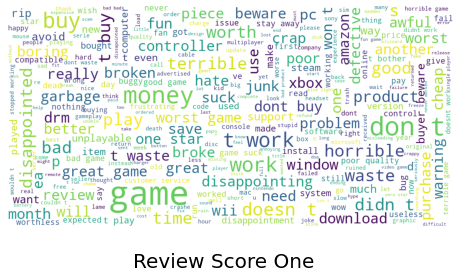

In [73]:
show_wordcloud(cluster1["summaryClean"][0], title = "Review Score One")

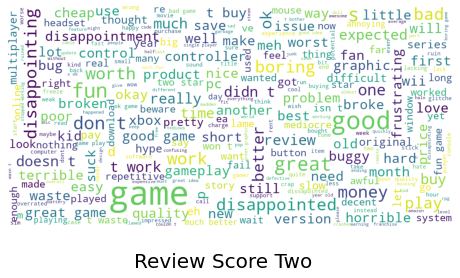

In [74]:
show_wordcloud(cluster1["summaryClean"][1] , title = "Review Score Two")

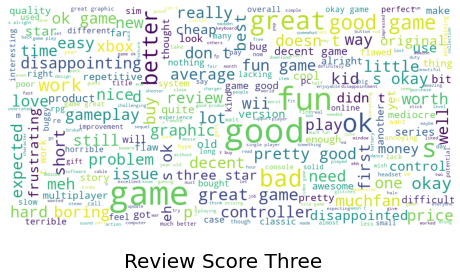

In [75]:
show_wordcloud(cluster1["summaryClean"][2], title = "Review Score Three")

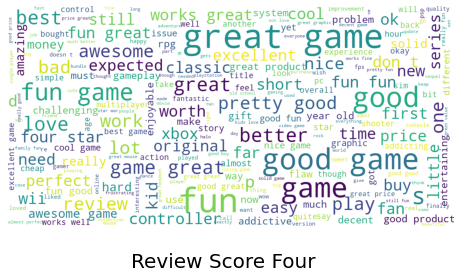

In [76]:
show_wordcloud(cluster1["summaryClean"][3], title = "Review Score Four")

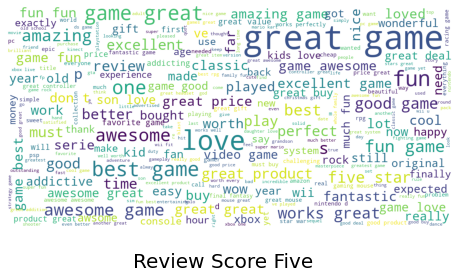

In [77]:
show_wordcloud(cluster1["summaryClean"][4], title = "Review Score Five")